![](logo_small.png)

#### Name - Rohan Jadhav
#### Emailid :- jadhavrohan26@gmail.com

## Task 2 :- To Explore Supervised Machine Learning.

#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

###### Dataset For Task :- http://bit.ly/w-data

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics


Data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print(Data.head())

#Explore the shape of the data. 
print("\n")
print('Shape of the Data:', Data.shape)

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


Shape of the Data: (25, 2)


In [2]:

# To get quick overview of the dataset we use info() function. In pandas info() function is used to get concise summary of the dataframe.

print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes
None


In [3]:
# Now Check is there any Null value in our dataset. 

Data.isnull().any()

Hours     False
Scores    False
dtype: bool

In [4]:
# Now Check the basic statistical details of a data frame. In pandas describe() function is used to get a summary of statistics pertaining to the DataFrame columns.

Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Here We Check the percentile, mean, std, min, max values of the dataframe.

Data Visualization of Given Dataset

Scatter Plot

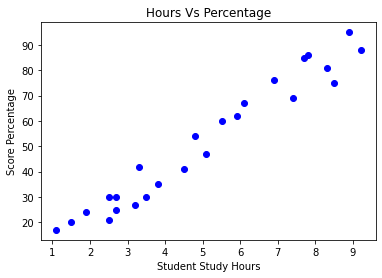

In [5]:
plt.scatter(Data.Hours,Data.Scores,Color = "blue")
plt.xlabel('Student Study Hours')
plt.ylabel("Score Percentage")
plt.title("Hours Vs Percentage")
plt.show()

After Scatter we see there is a linear relationship between the number of hours studied and percentage of score.

Now Preparing the data for LinearRegression.

In [6]:
# Divide the dataset into X as "Input" and Y as "Output"

X = Data.iloc[ :, : -1].values   #Input
Y = Data.iloc[ :, 1].values    #Output

# Split the dataset into train and test

X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size = 0.2, random_state = 3)

print('Shape of the X_train :', X_train.shape)
print('Shape of the X_test :', X_test.shape)

print("\n")
print('Shape of the Y_train :', Y_train.shape)
print('Shape of the Y_test :', Y_test.shape)

print("\n")
print("Here, We split the data 80% into training set and 20% into testing set.")

Shape of the X_train : (20, 1)
Shape of the X_test : (5, 1)


Shape of the Y_train : (20,)
Shape of the Y_test : (5,)


Here, We split the data 80% into training set and 20% into testing set.


### Modal Building

In [7]:
# Fitting LinearRegression 

Modal = LinearRegression()
Modal.fit(X_train,Y_train)

LinearRegression()

In [8]:
#Predicting the Test set Result
y_prediction = Modal.predict(X_test)

# Accuracy Score
score=r2_score(Y_test,y_prediction)
print('\n''LinearRegression modal score :',(score))


LinearRegression modal score : 0.945261762833401


In [9]:
#Comparing Predicted value and Actual Value
dataframe  = pd.DataFrame({'Actual_Value' : Y_test, 'Predicted_Value' : y_prediction})
dataframe

,Actual_Value,Predicted_Value
0,67,61.072402
1,24,21.181131
2,41,45.875727
3,76,68.670739
4,95,87.666582


### Analysing The Data

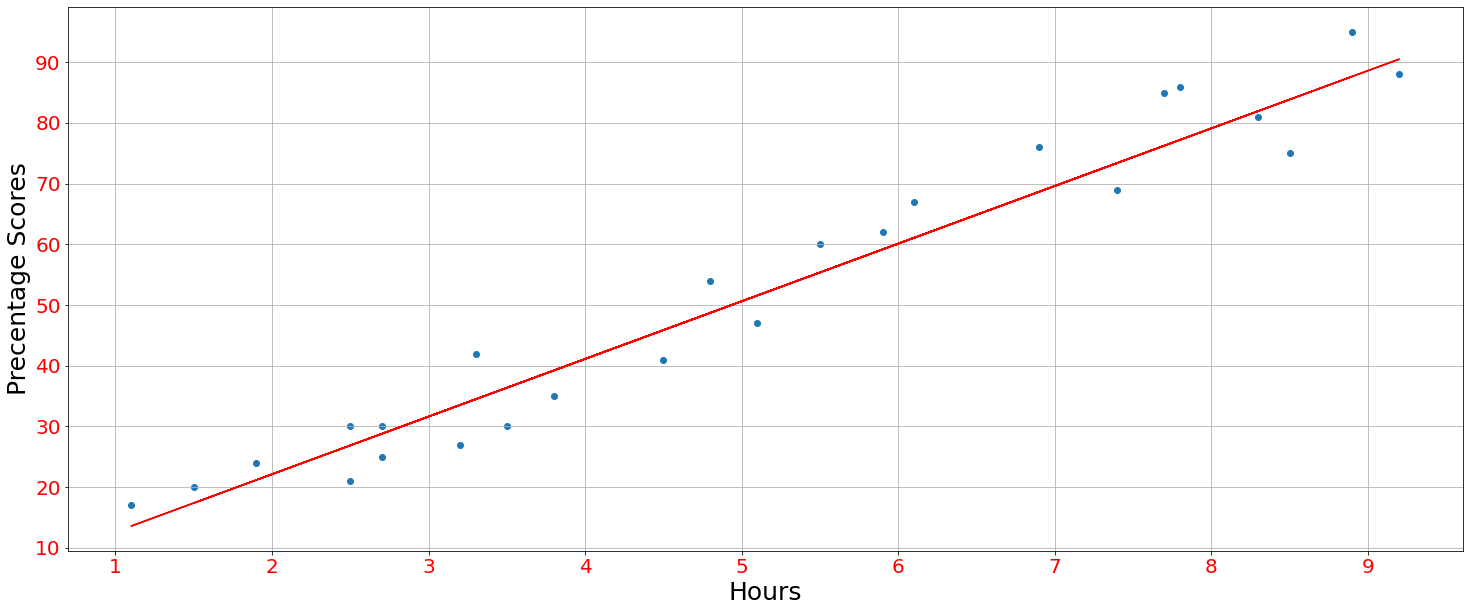

In [10]:
Coefficients = Modal.coef_
Intercept = Modal.intercept_
Line = Coefficients*X+Intercept

plt.figure(figsize= (25,10))
plt.scatter(X,Y)
plt.plot(X,Line,color='red')
plt.yticks(fontsize=20,color = 'red')
plt.xticks(fontsize=20,color = 'red')
plt.xlabel('Hours',color='black',size = 25)
plt.ylabel('Precentage Scores',color='black',size = 25)
plt.grid()
plt.show()

#### PredictingThe Score for Students for  Hours studied

In [11]:
Hours_Studied = ([9.25],)
Predicited_Score = Modal.predict(Hours_Studied)
print('Number of Hour:', Hours_Studied)
print('Predicited Score:', Predicited_Score)

Number of Hour: ([9.25],)
Predicited Score: [90.990855]


### Evaluate the performance of Modal

In [12]:
print('Coefficients_Value:',Coefficients)
print('\n''Intercept_Value:',Intercept)
print('\n''Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_prediction))  
print('\n''Root Mean Absolute Error:', np.sqrt(metrics.mean_absolute_error(Y_test, y_prediction)))
print('\n''Mean Squared Error:', metrics.mean_squared_error(Y_test, y_prediction))  
print('\n''Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_prediction)))

Coefficients_Value: [9.49792159]

Intercept_Value: 3.135080283641699

Mean Absolute Error: 5.656974488548368

Root Mean Absolute Error: 2.3784395070189124

Mean Squared Error: 34.87044660461019

Root Mean Squared Error: 5.905120371729113


##### Accurcy Score of linearRegression Modal 94.52% 

Here we can see that the value of Root Mean Squared Error is 5.905, Which is less than 10% of the Mean value of the scores of all the students i.e 51.48.This means that our Modal did a great work.